In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
from keras.datasets import mnist
import time

## Carregamento do Dataset MNIST

In [2]:
print("Carregando o dataset MNIST...")

try:
    (X_train_keras, y_train_keras), (X_test_keras, y_test_keras) = mnist.load_data()
    X = np.concatenate(
        (X_train_keras.reshape(-1, 28 * 28), X_test_keras.reshape(-1, 28 * 28))
    )
    y = np.concatenate((y_train_keras, y_test_keras))
    print("Dataset MNIST carregado com sucesso!")
except Exception as e:
    print(f"Erro ao carregar o dataset MNIST: {e}")


if "X" in locals() and "y" in locals():
    print(f"Formato dos dados (X): {X.shape}")
    print(f"Formato dos rótulos (y): {y.shape}")
    print(f"Número de classes únicas: {len(np.unique(y))}")
    print(f"Classes: {np.unique(y)}")
    print(f"Valor mínimo dos pixels: {X.min()}")
    print(f"Valor máximo dos pixels: {X.max()}")
else:
    print("ERRO: Dataset não carregado.")

Carregando o dataset MNIST...
11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Dataset MNIST carregado com sucesso!
Formato dos dados (X): (70000, 784)
Formato dos rótulos (y): (70000,)
Número de classes únicas: 10
Classes: [0 1 2 3 4 5 6 7 8 9]
Valor mínimo dos pixels: 0
Valor máximo dos pixels: 255


## Análise Exploratória dos Dados (EDA)

Visualizando algumas amostras do dataset MNIST:


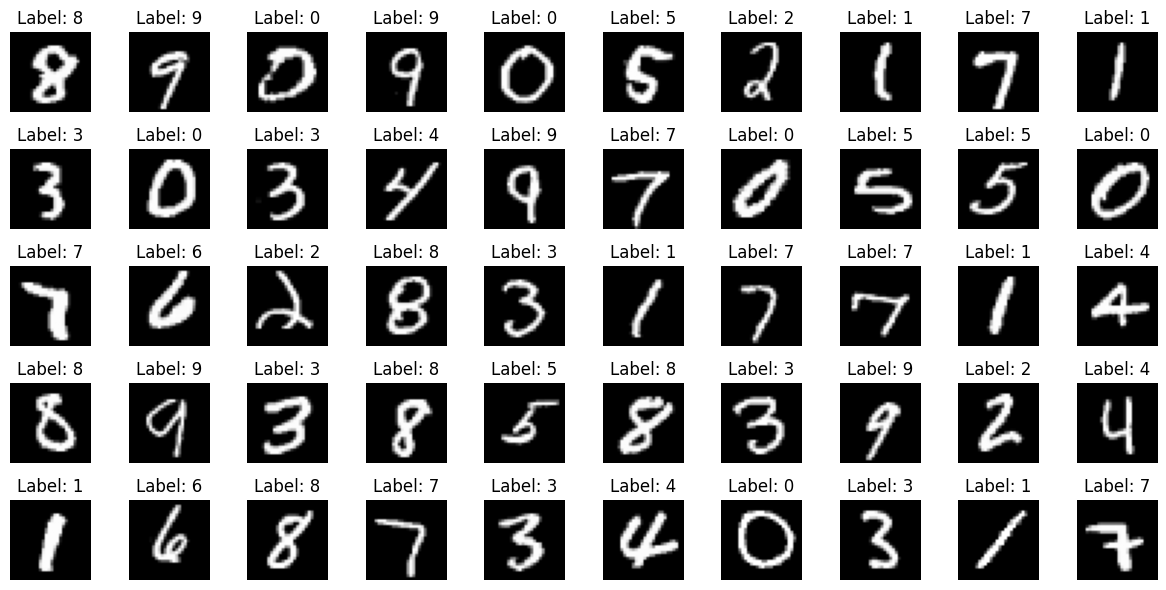

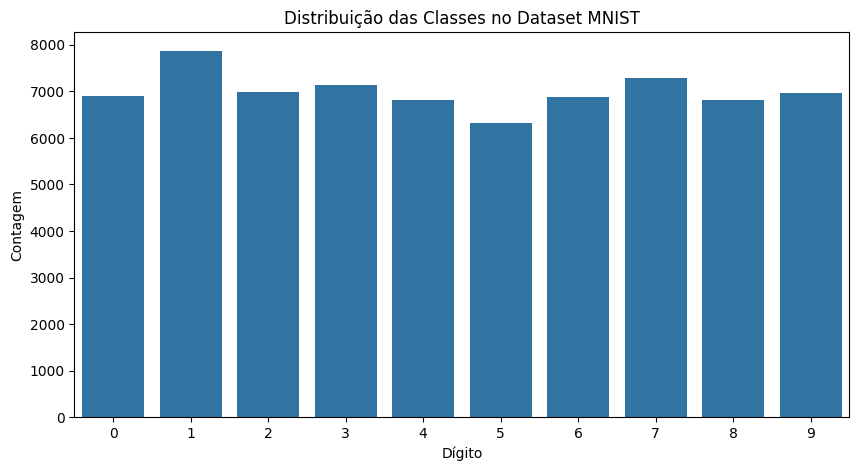

In [3]:
if "X" in locals() and "y" in locals():

    def plot_digits(data, labels, num_rows=5, num_cols=10):
        """Plota uma grade de dígitos."""
        plt.figure(figsize=(num_cols * 1.2, num_rows * 1.2))
        for i in range(num_rows * num_cols):
            if i < len(data):
                plt.subplot(num_rows, num_cols, i + 1)
                plt.imshow(data[i].reshape(28, 28), cmap="gray")
                plt.title(f"Label: {labels[i]}")
                plt.axis("off")
        plt.tight_layout()
        plt.show()

    print("Visualizando algumas amostras do dataset MNIST:")
    # Seleciona 50 amostras aleatórias para visualização
    random_indices = np.random.choice(len(X), 50, replace=False)
    plot_digits(X[random_indices], y[random_indices], num_rows=5, num_cols=10)
else:
    print("Dataset não carregado. Pule esta célula.")


if "y" in locals():
    plt.figure(figsize=(10, 5))
    sns.countplot(x=y)
    plt.title("Distribuição das Classes no Dataset MNIST")
    plt.xlabel("Dígito")
    plt.ylabel("Contagem")

else:
    print("Dataset não carregado. Pule esta célula.")

## Pré-processamento dos Dados

In [4]:
if "X" in locals():
    # X já está "achatado" (70000, 784)
    # Normalização (Escalar para [0, 1]) - Opção 1
    # X_normalized = X / 255.0

    # Padronização (Média 0, Desvio Padrão 1) - Opção 2 (geralmente melhor para PCA e muitos classificadores)
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(
        X.astype(np.float64)
    )  # Converter para float para evitar problemas com StandardScaler

    print("Dados pré-processados (padronizados).")
    print(f"Formato de X_scaled: {X_scaled.shape}")
    print(f"Média de X_scaled (aprox): {X_scaled.mean():.2f}")
    print(f"Desvio padrão de X_scaled (aprox): {X_scaled.std():.2f}")
else:
    print("Dataset não carregado. Pule esta célula.")

Dados pré-processados (padronizados).
Formato de X_scaled: (70000, 784)
Média de X_scaled (aprox): 0.00
Desvio padrão de X_scaled (aprox): 0.96


In [5]:
if "X_scaled" in locals() and "y" in locals():
    # Primeiro, dividir em treino+validação (80%) e teste (20%)
    X_train_val, X_test, y_train_val, y_test = train_test_split(
        X_scaled, y, test_size=0.2, random_state=42, stratify=y
    )

    # Depois, dividir treino+validação em treino (75% de 80% = 60% do total) e validação (25% de 80% = 20% do total)
    X_train, X_val, y_train, y_val = train_test_split(
        X_train_val,
        y_train_val,
        test_size=0.25,
        random_state=42,
        stratify=y_train_val,  # 0.25 * 0.8 = 0.2
    )

    print(
        f"Tamanho do conjunto de Treinamento: {X_train.shape[0]} amostras ({X_train.shape[0]*100/X_scaled.shape[0]:.0f}%)"
    )
    print(
        f"Tamanho do conjunto de Validação: {X_val.shape[0]} amostras ({X_val.shape[0]*100/X_scaled.shape[0]:.0f}%)"
    )
    print(
        f"Tamanho do conjunto de Teste: {X_test.shape[0]} amostras ({X_test.shape[0]*100/X_scaled.shape[0]:.0f}%)"
    )

    # Verificar a estratificação
    print("\nDistribuição das classes no conjunto de Treinamento:")
    print(np.bincount(y_train))
    print("Distribuição das classes no conjunto de Validação:")
    print(np.bincount(y_val))
    print("Distribuição das classes no conjunto de Teste:")
    print(np.bincount(y_test))
else:
    print("Dados não pré-processados. Pule esta célula.")

Tamanho do conjunto de Treinamento: 42000 amostras (60%)
Tamanho do conjunto de Validação: 14000 amostras (20%)
Tamanho do conjunto de Teste: 14000 amostras (20%)

Distribuição das classes no conjunto de Treinamento:
[4141 4727 4194 4285 4094 3788 4126 4375 4095 4175]
Distribuição das classes no conjunto de Validação:
[1381 1575 1398 1428 1365 1262 1375 1459 1365 1392]
Distribuição das classes no conjunto de Teste:
[1381 1575 1398 1428 1365 1263 1375 1459 1365 1391]


## Redução de Dimensionalidade

Aplicando PCA...
Número original de features: 784
Número de features após PCA (para 95% da variância): 318
Formato de X_train_pca: (42000, 318)


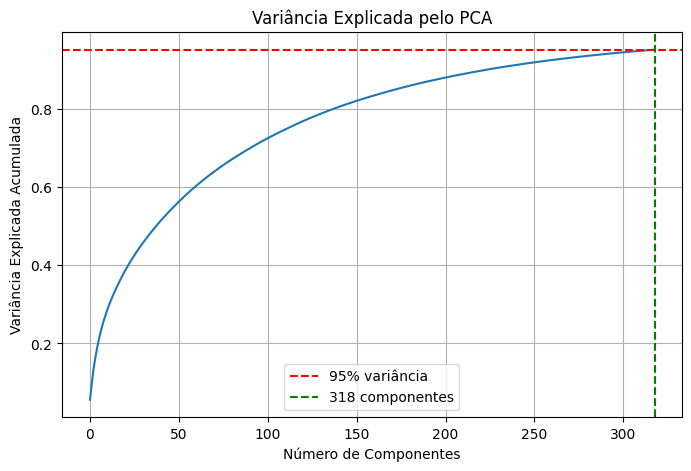

In [6]:
if "X_train" in locals():
    print("Aplicando PCA...")
    # Inicialmente, vamos ajustar o PCA para capturar 95% da variância
    pca = PCA(n_components=0.95, random_state=42)
    X_train_pca = pca.fit_transform(X_train)
    X_val_pca = pca.transform(X_val)
    X_test_pca = pca.transform(X_test)

    print(f"Número original de features: {X_train.shape[1]}")
    print(f"Número de features após PCA (para 95% da variância): {pca.n_components_}")
    print(f"Formato de X_train_pca: {X_train_pca.shape}")

    # Plotar a variância explicada acumulada
    plt.figure(figsize=(8, 5))
    plt.plot(np.cumsum(pca.explained_variance_ratio_))
    plt.xlabel("Número de Componentes")
    plt.ylabel("Variância Explicada Acumulada")
    plt.title("Variância Explicada pelo PCA")
    plt.grid(True)
    plt.axhline(y=0.95, color="r", linestyle="--", label="95% variância")
    plt.axvline(
        x=pca.n_components_,
        color="g",
        linestyle="--",
        label=f"{pca.n_components_} componentes",
    )
    plt.legend()
    plt.show()
else:
    print("Conjuntos de dados não divididos. Pule esta célula.")

## kNN com todas as features

Avaliando kNN com dados originais (784 features)...

  Métrica de Distância: euclidean
    k=3, Acurácia (Validação): 0.9438, Tempo: 2.80s
    k=5, Acurácia (Validação): 0.9435, Tempo: 2.72s
    k=7, Acurácia (Validação): 0.9421, Tempo: 2.72s
    k=9, Acurácia (Validação): 0.9386, Tempo: 2.76s
    k=11, Acurácia (Validação): 0.9378, Tempo: 2.88s
    Melhor k para métrica euclidean: 3 com acurácia 0.9438

  Métrica de Distância: manhattan
    k=3, Acurácia (Validação): 0.9593, Tempo: 52.92s
    k=5, Acurácia (Validação): 0.9596, Tempo: 54.18s
    k=7, Acurácia (Validação): 0.9576, Tempo: 54.47s
    k=9, Acurácia (Validação): 0.9547, Tempo: 52.07s
    k=11, Acurácia (Validação): 0.9536, Tempo: 51.90s
    Melhor k para métrica manhattan: 5 com acurácia 0.9596


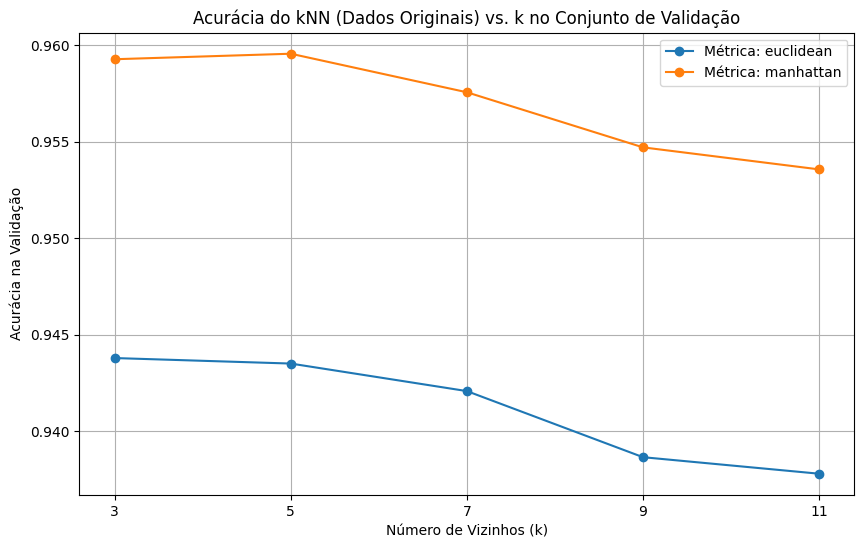

In [7]:
if "X_train" in locals():
    k_values = [3, 5, 7, 9, 11]
    distance_metrics = ["euclidean", "manhattan"]  # 'minkowski' p=2 e p=1
    best_k_original = {}
    best_accuracy_original = {}
    knn_results_original = {}

    print("Avaliando kNN com dados originais (784 features)...")

    for metric in distance_metrics:
        print(f"\n  Métrica de Distância: {metric}")
        best_k_metric = -1
        best_accuracy_metric = -1
        accuracies_val = []

        for k in k_values:
            start_time = time.time()
            knn = KNeighborsClassifier(
                n_neighbors=k, metric=metric, n_jobs=-1
            )  # n_jobs=-1 usa todos os processadores
            knn.fit(X_train, y_train)
            y_pred_val = knn.predict(X_val)
            accuracy_val = accuracy_score(y_val, y_pred_val)
            accuracies_val.append(accuracy_val)
            end_time = time.time()

            print(
                f"    k={k}, Acurácia (Validação): {accuracy_val:.4f}, Tempo: {end_time - start_time:.2f}s"
            )

            if accuracy_val > best_accuracy_metric:
                best_accuracy_metric = accuracy_val
                best_k_metric = k

        best_k_original[metric] = best_k_metric
        best_accuracy_original[metric] = best_accuracy_metric
        knn_results_original[metric] = accuracies_val
        print(
            f"    Melhor k para métrica {metric}: {best_k_metric} com acurácia {best_accuracy_metric:.4f}"
        )

    # Plotar resultados da validação para kNN com dados originais
    plt.figure(figsize=(10, 6))
    for metric in distance_metrics:
        plt.plot(
            k_values,
            knn_results_original[metric],
            marker="o",
            label=f"Métrica: {metric}",
        )
    plt.title("Acurácia do kNN (Dados Originais) vs. k no Conjunto de Validação")
    plt.xlabel("Número de Vizinhos (k)")
    plt.ylabel("Acurácia na Validação")
    plt.xticks(k_values)
    plt.legend()
    plt.grid(True)
    plt.show()

else:
    print("Dados não preparados. Pule esta célula.")

## kNN com features reduzidas


Avaliando kNN com dados reduzidos (318 features via PCA)...

  Métrica de Distância: euclidean
    k=3, Acurácia (Validação): 0.9501, Tempo: 1.47s
    k=5, Acurácia (Validação): 0.9486, Tempo: 1.56s
    k=7, Acurácia (Validação): 0.9464, Tempo: 1.43s
    k=9, Acurácia (Validação): 0.9441, Tempo: 1.43s
    k=11, Acurácia (Validação): 0.9415, Tempo: 1.53s
    Melhor k para métrica euclidean (PCA): 3 com acurácia 0.9501

  Métrica de Distância: manhattan
    k=3, Acurácia (Validação): 0.9326, Tempo: 17.71s
    k=5, Acurácia (Validação): 0.9312, Tempo: 18.67s
    k=7, Acurácia (Validação): 0.9290, Tempo: 18.62s
    k=9, Acurácia (Validação): 0.9249, Tempo: 18.95s
    k=11, Acurácia (Validação): 0.9230, Tempo: 19.06s
    Melhor k para métrica manhattan (PCA): 3 com acurácia 0.9326


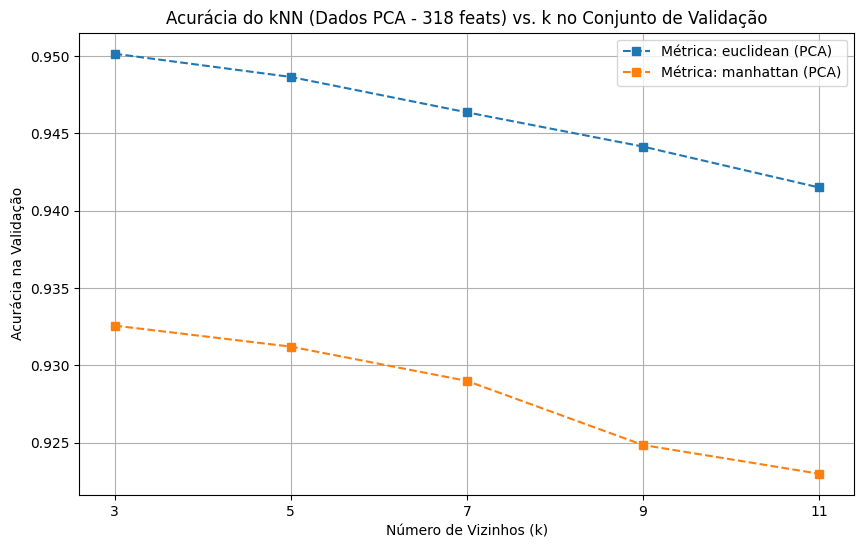

In [8]:
if "X_train_pca" in locals():
    best_k_pca = {}
    best_accuracy_pca = {}
    knn_results_pca = {}

    print(
        f"\nAvaliando kNN com dados reduzidos ({X_train_pca.shape[1]} features via PCA)..."
    )

    for metric in distance_metrics:
        print(f"\n  Métrica de Distância: {metric}")
        best_k_metric_pca = -1
        best_accuracy_metric_pca = -1
        accuracies_val_pca = []

        for k in k_values:
            start_time = time.time()
            knn_pca = KNeighborsClassifier(n_neighbors=k, metric=metric, n_jobs=-1)
            knn_pca.fit(X_train_pca, y_train)
            y_pred_val_pca = knn_pca.predict(X_val_pca)
            accuracy_val_pca = accuracy_score(y_val, y_pred_val_pca)
            accuracies_val_pca.append(accuracy_val_pca)
            end_time = time.time()

            print(
                f"    k={k}, Acurácia (Validação): {accuracy_val_pca:.4f}, Tempo: {end_time - start_time:.2f}s"
            )

            if accuracy_val_pca > best_accuracy_metric_pca:
                best_accuracy_metric_pca = accuracy_val_pca
                best_k_metric_pca = k

        best_k_pca[metric] = best_k_metric_pca
        best_accuracy_pca[metric] = best_accuracy_metric_pca
        knn_results_pca[metric] = accuracies_val_pca
        print(
            f"    Melhor k para métrica {metric} (PCA): {best_k_metric_pca} com acurácia {best_accuracy_metric_pca:.4f}"
        )

    # Plotar resultados da validação para kNN com dados PCA
    plt.figure(figsize=(10, 6))
    for metric in distance_metrics:
        plt.plot(
            k_values,
            knn_results_pca[metric],
            marker="s",
            linestyle="--",
            label=f"Métrica: {metric} (PCA)",
        )
    plt.title(
        f"Acurácia do kNN (Dados PCA - {X_train_pca.shape[1]} feats) vs. k no Conjunto de Validação"
    )
    plt.xlabel("Número de Vizinhos (k)")
    plt.ylabel("Acurácia na Validação")
    plt.xticks(k_values)
    plt.legend()
    plt.grid(True)
    plt.show()

else:
    print("Dados PCA não preparados. Pule esta célula.")

## Avaliação do Modelo

Melhor configuração geral do kNN (validação): {'data': 'original', 'metric': 'manhattan', 'k': 5, 'acc_val': 0.9595714285714285}

Avaliando o melhor kNN no conjunto de teste...
Usando dados originais, k=5, métrica=manhattan
Acurácia do kNN no conjunto de Teste: 0.9554
Tempo de predição no teste: 54.06s (para 14000 amostras)

Matriz de Confusão (kNN no Teste):


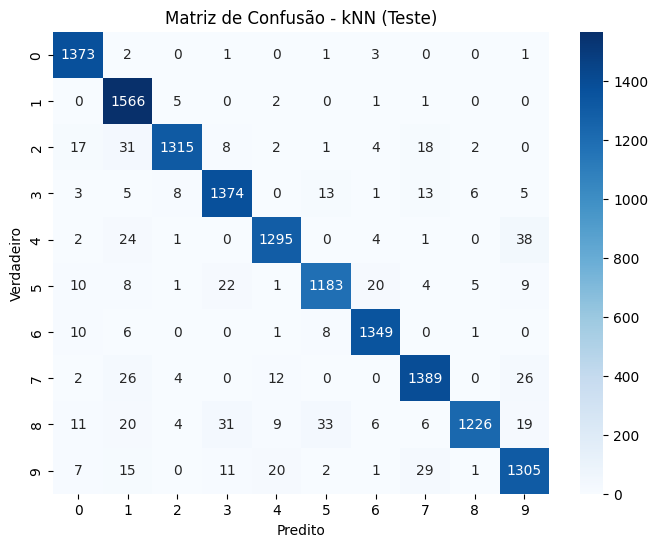


Relatório de Classificação (kNN no Teste):
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1381
           1       0.92      0.99      0.96      1575
           2       0.98      0.94      0.96      1398
           3       0.95      0.96      0.96      1428
           4       0.96      0.95      0.96      1365
           5       0.95      0.94      0.94      1263
           6       0.97      0.98      0.98      1375
           7       0.95      0.95      0.95      1459
           8       0.99      0.90      0.94      1365
           9       0.93      0.94      0.93      1391

    accuracy                           0.96     14000
   macro avg       0.96      0.95      0.96     14000
weighted avg       0.96      0.96      0.96     14000



In [9]:
if "best_k_original" in locals() and "best_k_pca" in locals():
    # Determinar a melhor configuração geral do kNN (original vs PCA, e qual métrica)
    # Comparar best_accuracy_original[metric] com best_accuracy_pca[metric]

    best_overall_knn_acc = -1
    best_overall_knn_config = {}

    for metric in distance_metrics:
        if best_accuracy_original[metric] > best_overall_knn_acc:
            best_overall_knn_acc = best_accuracy_original[metric]
            best_overall_knn_config = {
                "data": "original",
                "metric": metric,
                "k": best_k_original[metric],
                "acc_val": best_accuracy_original[metric],
            }

        if best_accuracy_pca[metric] > best_overall_knn_acc:
            best_overall_knn_acc = best_accuracy_pca[metric]
            best_overall_knn_config = {
                "data": "pca",
                "metric": metric,
                "k": best_k_pca[metric],
                "acc_val": best_accuracy_pca[metric],
            }

    print(f"Melhor configuração geral do kNN (validação): {best_overall_knn_config}")

    # Treinar o melhor modelo kNN e avaliar no conjunto de teste
    print("\nAvaliando o melhor kNN no conjunto de teste...")

    final_knn_k = best_overall_knn_config["k"]
    final_knn_metric = best_overall_knn_config["metric"]

    if best_overall_knn_config["data"] == "original":
        X_train_final_knn = X_train
        X_test_final_knn = X_test
        print(f"Usando dados originais, k={final_knn_k}, métrica={final_knn_metric}")
    else:  # pca
        X_train_final_knn = X_train_pca
        X_test_final_knn = X_test_pca
        print(
            f"Usando dados PCA ({X_train_pca.shape[1]} feats), k={final_knn_k}, métrica={final_knn_metric}"
        )

    final_knn_model = KNeighborsClassifier(
        n_neighbors=final_knn_k, metric=final_knn_metric, n_jobs=-1
    )
    start_time = time.time()
    final_knn_model.fit(X_train_final_knn, y_train)
    y_pred_test_knn = final_knn_model.predict(X_test_final_knn)
    accuracy_test_knn = accuracy_score(y_test, y_pred_test_knn)
    end_time = time.time()

    print(f"Acurácia do kNN no conjunto de Teste: {accuracy_test_knn:.4f}")
    print(
        f"Tempo de predição no teste: {end_time - start_time:.2f}s (para {len(X_test_final_knn)} amostras)"
    )

    print("\nMatriz de Confusão (kNN no Teste):")
    cm_knn = confusion_matrix(y_test, y_pred_test_knn)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm_knn, annot=True, fmt="d", cmap="Blues")
    plt.title("Matriz de Confusão - kNN (Teste)")
    plt.xlabel("Predito")
    plt.ylabel("Verdadeiro")
    plt.show()

    print("\nRelatório de Classificação (kNN no Teste):")
    print(classification_report(y_test, y_pred_test_knn))
else:
    print("Resultados da validação do kNN não disponíveis.")

## Classificação Linear

## Regressão Logística com todas as features

In [10]:
if "X_train" in locals():
    print("Avaliando Regressão Logística com dados originais (784 features)...")

    # Parâmetros para testar (C é o inverso da força da regularização)
    # C_values = [0.01, 0.1, 1, 10] # Pode demorar mais, usar um valor razoável
    C_values = [1.0]  # Para um teste mais rápido, ou ajuste fino posterior
    best_C_original_lr = -1
    best_accuracy_original_lr = -1
    lr_results_original = {}

    for C_param in C_values:
        start_time = time.time()
        # solver='saga' é bom para datasets grandes e suporta regularização L1 e L2.
        # 'lbfgs' é um bom padrão para problemas menores/médios.
        # max_iter pode precisar ser aumentado para convergência.
        log_reg_original = LogisticRegression(
            C=C_param,
            solver="saga",
            multi_class="multinomial",
            max_iter=100,
            random_state=42,
            n_jobs=-1,
        )
        # Para datasets muito grandes e muitos C_values, max_iter=100 pode ser pouco.
        # Se houver aviso de convergência, aumente max_iter (ex: 200, 500, 1000).
        # Para este exemplo, vamos manter 100 para velocidade, mas em um projeto real, ajuste.
        # Se saga for lento, tente solver='lbfgs' com max_iter=1000 (não suporta n_jobs=-1 para lbfgs)
        # log_reg_original = LogisticRegression(C=C_param, solver='lbfgs', multi_class='multinomial', max_iter=1000, random_state=42)

        print(f"  Treinando Regressão Logística (Original) com C={C_param}...")
        log_reg_original.fit(X_train, y_train)

        y_pred_val_lr_original = log_reg_original.predict(X_val)
        accuracy_val_lr_original = accuracy_score(y_val, y_pred_val_lr_original)
        end_time = time.time()

        lr_results_original[C_param] = accuracy_val_lr_original
        print(
            f"    C={C_param}, Acurácia (Validação): {accuracy_val_lr_original:.4f}, Tempo: {end_time - start_time:.2f}s"
        )

        if accuracy_val_lr_original > best_accuracy_original_lr:
            best_accuracy_original_lr = accuracy_val_lr_original
            best_C_original_lr = C_param

    print(
        f"  Melhor C para Regressão Logística (Original): {best_C_original_lr} com acurácia {best_accuracy_original_lr:.4f}"
    )

else:
    print("Dados não preparados. Pule esta célula.")

Avaliando Regressão Logística com dados originais (784 features)...
  Treinando Regressão Logística (Original) com C=1.0...


/Users/viniciusmioto/Projects/mnsit_knn_n_linear/.venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


    C=1.0, Acurácia (Validação): 0.9181, Tempo: 54.75s
  Melhor C para Regressão Logística (Original): 1.0 com acurácia 0.9181


/Users/viniciusmioto/Projects/mnsit_knn_n_linear/.venv/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


## Regressão Logística com features reduzidas

In [11]:
if "X_train_pca" in locals():
    print(
        f"\nAvaliando Regressão Logística com dados reduzidos ({X_train_pca.shape[1]} features via PCA)..."
    )

    best_C_pca_lr = -1
    best_accuracy_pca_lr = -1
    lr_results_pca = {}

    for C_param in C_values:  # Usando os mesmos C_values
        start_time = time.time()
        log_reg_pca = LogisticRegression(
            C=C_param,
            solver="saga",
            multi_class="multinomial",
            max_iter=100,
            random_state=42,
            n_jobs=-1,
        )
        # log_reg_pca = LogisticRegression(C=C_param, solver='lbfgs', multi_class='multinomial', max_iter=1000, random_state=42)

        print(f"  Treinando Regressão Logística (PCA) com C={C_param}...")
        log_reg_pca.fit(X_train_pca, y_train)

        y_pred_val_lr_pca = log_reg_pca.predict(X_val_pca)
        accuracy_val_lr_pca = accuracy_score(y_val, y_pred_val_lr_pca)
        end_time = time.time()

        lr_results_pca[C_param] = accuracy_val_lr_pca
        print(
            f"    C={C_param}, Acurácia (Validação): {accuracy_val_lr_pca:.4f}, Tempo: {end_time - start_time:.2f}s"
        )

        if accuracy_val_lr_pca > best_accuracy_pca_lr:
            best_accuracy_pca_lr = accuracy_val_lr_pca
            best_C_pca_lr = C_param

    print(
        f"  Melhor C para Regressão Logística (PCA): {best_C_pca_lr} com acurácia {best_accuracy_pca_lr:.4f}"
    )
else:
    print("Dados PCA não preparados. Pule esta célula.")

/Users/viniciusmioto/Projects/mnsit_knn_n_linear/.venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(



Avaliando Regressão Logística com dados reduzidos (318 features via PCA)...
  Treinando Regressão Logística (PCA) com C=1.0...
    C=1.0, Acurácia (Validação): 0.9181, Tempo: 21.18s
  Melhor C para Regressão Logística (PCA): 1.0 com acurácia 0.9181


/Users/viniciusmioto/Projects/mnsit_knn_n_linear/.venv/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


## Avaliação do Modelo

/Users/viniciusmioto/Projects/mnsit_knn_n_linear/.venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Melhor configuração para Regressão Logística: Dados Originais, C=1.0, Acurácia Val: 0.9181

Avaliando a melhor Regressão Logística no conjunto de teste...
Acurácia da Regressão Logística no conjunto de Teste: 0.9164
Tempo de predição no teste: 111.61s (para 14000 amostras)

Matriz de Confusão (Regressão Logística no Teste):


/Users/viniciusmioto/Projects/mnsit_knn_n_linear/.venv/lib/python3.13/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


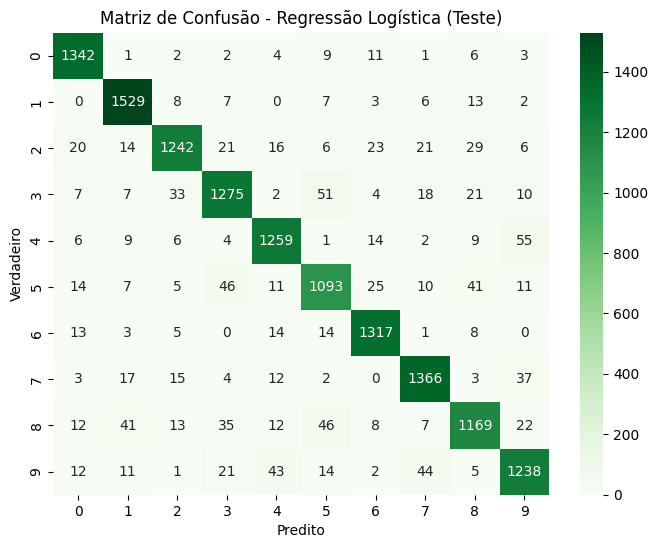


Relatório de Classificação (Regressão Logística no Teste):
              precision    recall  f1-score   support

           0       0.94      0.97      0.96      1381
           1       0.93      0.97      0.95      1575
           2       0.93      0.89      0.91      1398
           3       0.90      0.89      0.90      1428
           4       0.92      0.92      0.92      1365
           5       0.88      0.87      0.87      1263
           6       0.94      0.96      0.95      1375
           7       0.93      0.94      0.93      1459
           8       0.90      0.86      0.88      1365
           9       0.89      0.89      0.89      1391

    accuracy                           0.92     14000
   macro avg       0.92      0.92      0.92     14000
weighted avg       0.92      0.92      0.92     14000



In [12]:
if "best_C_original_lr" in locals() and "best_C_pca_lr" in locals():
    # Determinar a melhor configuração geral da Regressão Logística
    if (
        best_accuracy_original_lr >= best_accuracy_pca_lr
    ):  # Dando preferência ao original em caso de empate
        final_lr_C = best_C_original_lr
        final_lr_data_type = "original"
        X_train_final_lr = X_train
        X_test_final_lr = X_test
        print(
            f"Melhor configuração para Regressão Logística: Dados Originais, C={final_lr_C}, Acurácia Val: {best_accuracy_original_lr:.4f}"
        )
    else:
        final_lr_C = best_C_pca_lr
        final_lr_data_type = "pca"
        X_train_final_lr = X_train_pca
        X_test_final_lr = X_test_pca
        print(
            f"Melhor configuração para Regressão Logística: Dados PCA ({X_train_pca.shape[1]} feats), C={final_lr_C}, Acurácia Val: {best_accuracy_pca_lr:.4f}"
        )

    print("\nAvaliando a melhor Regressão Logística no conjunto de teste...")
    final_log_reg_model = LogisticRegression(
        C=final_lr_C,
        solver="saga",
        multi_class="multinomial",
        max_iter=200,
        random_state=42,
        n_jobs=-1,
    )  # Aumentar max_iter para teste final
    # final_log_reg_model = LogisticRegression(C=final_lr_C, solver='lbfgs', multi_class='multinomial', max_iter=1000, random_state=42)

    start_time = time.time()
    final_log_reg_model.fit(X_train_final_lr, y_train)
    y_pred_test_lr = final_log_reg_model.predict(X_test_final_lr)
    accuracy_test_lr = accuracy_score(y_test, y_pred_test_lr)
    end_time = time.time()

    print(
        f"Acurácia da Regressão Logística no conjunto de Teste: {accuracy_test_lr:.4f}"
    )
    print(
        f"Tempo de predição no teste: {end_time - start_time:.2f}s (para {len(X_test_final_lr)} amostras)"
    )

    print("\nMatriz de Confusão (Regressão Logística no Teste):")
    cm_lr = confusion_matrix(y_test, y_pred_test_lr)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm_lr, annot=True, fmt="d", cmap="Greens")
    plt.title("Matriz de Confusão - Regressão Logística (Teste)")
    plt.xlabel("Predito")
    plt.ylabel("Verdadeiro")
    plt.show()

    print("\nRelatório de Classificação (Regressão Logística no Teste):")
    print(classification_report(y_test, y_pred_test_lr))
else:
    print("Resultados da validação da Regressão Logística não disponíveis.")

# Outros Modelos

Experimentando com diferentes proporções de divisão de dados...
Modelo base para este experimento: kNN com config {'data': 'original', 'metric': 'manhattan', 'k': 5, 'acc_val': 0.9595714285714285}

Testando proporção: 60/20/20 (Original)
  Tamanhos: Treino=42000, Val=14000, Teste=14000
  Acurácia Validação: 0.9566
  Acurácia Teste: 0.9545
  Tempo Treino: 0.04s, Tempo Teste: 52.16s

Testando proporção: 70/15/15
  Tamanhos: Treino=49000, Val=10500, Teste=10500
  Acurácia Validação: 0.9564
  Acurácia Teste: 0.9587
  Tempo Treino: 0.04s, Tempo Teste: 50.13s

Testando proporção: 80/10/10
  Tamanhos: Treino=56000, Val=7000, Teste=7000
  Acurácia Validação: 0.9549
  Acurácia Teste: 0.9637
  Tempo Treino: 0.04s, Tempo Teste: 38.13s

Resultados da variação de proporções de divisão:
  60/20/20 (Original): Treino=42000, Val=14000, Teste=14000 -> Acc Val: 0.9566, Acc Teste: 0.9545
  70/15/15: Treino=49000, Val=10500, Teste=10500 -> Acc Val: 0.9564, Acc Teste: 0.9587
  80/10/10: Treino=56000, Val=7

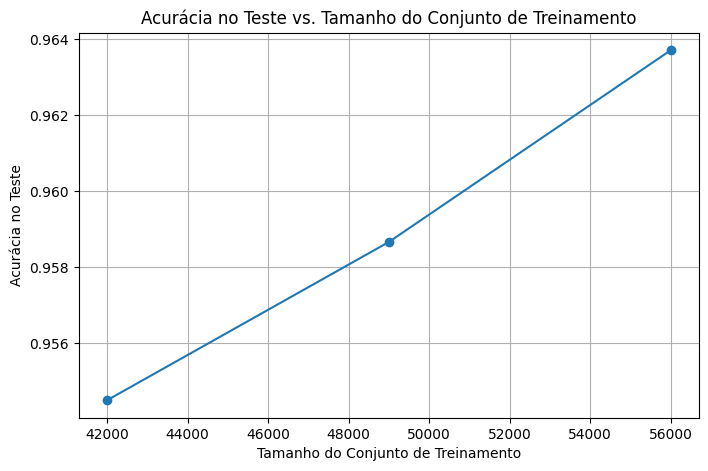

In [13]:
if (
    "final_knn_model" in locals() and "best_overall_knn_config" in locals()
):  # Checa se o melhor kNN foi definido
    print("Experimentando com diferentes proporções de divisão de dados...")
    print(
        f"Modelo base para este experimento: kNN com config {best_overall_knn_config}"
    )

    split_ratios = [
        {
            "train": 0.6,
            "val": 0.2,
            "test": 0.2,
            "label": "60/20/20 (Original)",
        },  # Referência
        {"train": 0.7, "val": 0.15, "test": 0.15, "label": "70/15/15"},
        {"train": 0.8, "val": 0.10, "test": 0.10, "label": "80/10/10"},
    ]

    results_split_ratios = []

    # Usar X_scaled e y originais para re-dividir
    original_X_for_split = X_scaled
    original_y_for_split = y

    use_pca_for_experiment = best_overall_knn_config["data"] == "pca"
    knn_k_for_experiment = best_overall_knn_config["k"]
    knn_metric_for_experiment = best_overall_knn_config["metric"]

    for ratio in split_ratios:
        print(f"\nTestando proporção: {ratio['label']}")

        # Divisão dos dados
        X_train_s, X_temp_s, y_train_s, y_temp_s = train_test_split(
            original_X_for_split,
            original_y_for_split,
            train_size=ratio["train"],
            random_state=42,
            stratify=original_y_for_split,
        )
        # Ajustar o test_size para a divisão de val/teste a partir do temp
        val_test_proportion = ratio["val"] / (ratio["val"] + ratio["test"])
        X_val_s, X_test_s, y_val_s, y_test_s = train_test_split(
            X_temp_s,
            y_temp_s,
            train_size=val_test_proportion,
            random_state=42,
            stratify=y_temp_s,
        )

        print(
            f"  Tamanhos: Treino={len(X_train_s)}, Val={len(X_val_s)}, Teste={len(X_test_s)}"
        )

        X_train_exp, X_val_exp, X_test_exp = X_train_s, X_val_s, X_test_s

        if use_pca_for_experiment:
            print("  Aplicando PCA para esta divisão...")
            # Reajustar PCA nos novos dados de treino e transformar todos
            # Usar o mesmo número de componentes que o PCA original determinou (pca.n_components_)
            # ou um número fixo se decidido anteriormente.
            # Para consistência, vamos usar o pca.n_components_ do PCA treinado na divisão 60/20/20
            # Se pca não estiver no escopo ou n_components_ não for acessível, defina um valor (ex: 150)
            n_comp_pca_exp = (
                pca.n_components_
                if "pca" in globals() and hasattr(pca, "n_components_")
                else 150
            )

            pca_exp = PCA(n_components=n_comp_pca_exp, random_state=42)
            X_train_exp = pca_exp.fit_transform(X_train_s)
            X_val_exp = pca_exp.transform(X_val_s)
            X_test_exp = pca_exp.transform(X_test_s)
            print(f"  PCA aplicado, {X_train_exp.shape[1]} componentes.")

        # Treinar e avaliar o kNN (usando o melhor k e métrica já encontrados)
        # Não vamos refazer a busca por k aqui, apenas observar o impacto da divisão
        model_exp = KNeighborsClassifier(
            n_neighbors=knn_k_for_experiment,
            metric=knn_metric_for_experiment,
            n_jobs=-1,
        )

        start_time_train = time.time()
        model_exp.fit(X_train_exp, y_train_s)
        train_time = time.time() - start_time_train

        # Avaliar na validação (apenas para referência, não para seleção de modelo aqui)
        y_pred_val_exp = model_exp.predict(X_val_exp)
        acc_val_exp = accuracy_score(y_val_s, y_pred_val_exp)

        # Avaliar no teste
        start_time_test = time.time()
        y_pred_test_exp = model_exp.predict(X_test_exp)
        acc_test_exp = accuracy_score(y_test_s, y_pred_test_exp)
        test_time = time.time() - start_time_test

        print(f"  Acurácia Validação: {acc_val_exp:.4f}")
        print(f"  Acurácia Teste: {acc_test_exp:.4f}")
        print(f"  Tempo Treino: {train_time:.2f}s, Tempo Teste: {test_time:.2f}s")

        results_split_ratios.append(
            {
                "label": ratio["label"],
                "train_size": len(X_train_s),
                "val_size": len(X_val_s),
                "test_size": len(X_test_s),
                "acc_val": acc_val_exp,
                "acc_test": acc_test_exp,
            }
        )

    # Exibir resultados da variação de proporções
    print("\nResultados da variação de proporções de divisão:")
    for res in results_split_ratios:
        print(
            f"  {res['label']}: Treino={res['train_size']}, Val={res['val_size']}, Teste={res['test_size']} -> Acc Val: {res['acc_val']:.4f}, Acc Teste: {res['acc_test']:.4f}"
        )

    # Plotar acurácia no teste vs. tamanho do treino
    train_sizes_plot = [r["train_size"] for r in results_split_ratios]
    test_accuracies_plot = [r["acc_test"] for r in results_split_ratios]

    plt.figure(figsize=(8, 5))
    plt.plot(train_sizes_plot, test_accuracies_plot, marker="o")
    plt.title("Acurácia no Teste vs. Tamanho do Conjunto de Treinamento")
    plt.xlabel("Tamanho do Conjunto de Treinamento")
    plt.ylabel("Acurácia no Teste")
    plt.grid(True)
    plt.show()

else:
    print("Melhor modelo kNN não definido. Pule esta célula.")

In [14]:
print("## Sumário dos Resultados Finais (Acurácia no Conjunto de Teste) ##")

if "accuracy_test_knn" in locals() and "best_overall_knn_config" in locals():
    print(f"\nMelhor kNN:")
    print(f"  Configuração: {best_overall_knn_config}")
    print(f"  Acurácia no Teste: {accuracy_test_knn:.4f}")
else:
    print("\nMelhor kNN: Resultados não disponíveis.")

if (
    "accuracy_test_lr" in locals()
):  # Assumindo que final_lr_C e final_lr_data_type estão definidos se accuracy_test_lr existe
    lr_data_desc = (
        "Dados Originais"
        if final_lr_data_type == "original"
        else f"Dados PCA ({X_test_final_lr.shape[1]} feats)"
    )
    print(f"\nMelhor Regressão Logística:")
    print(
        f"  Configuração: {lr_data_desc}, C={final_lr_C}"
    )  # final_lr_C e final_lr_data_type deveriam estar definidos
    print(f"  Acurácia no Teste: {accuracy_test_lr:.4f}")
else:
    print("\nMelhor Regressão Logística: Resultados não disponíveis.")

print("\nComparativo de Tempos (Exemplos da primeira execução 60/20/20):")

## Sumário dos Resultados Finais (Acurácia no Conjunto de Teste) ##

Melhor kNN:
  Configuração: {'data': 'original', 'metric': 'manhattan', 'k': 5, 'acc_val': 0.9595714285714285}
  Acurácia no Teste: 0.9554

Melhor Regressão Logística:
  Configuração: Dados Originais, C=1.0
  Acurácia no Teste: 0.9164

Comparativo de Tempos (Exemplos da primeira execução 60/20/20):
